# PubChem View tutorial
This package, as far as I know, is the only one that implements the PubChem View for downloading, i.e. experimental data for different compounds from PubChem. The available parameters are [available here](https://pubchem.ncbi.nlm.nih.gov/classification/#hid=72).

In [2]:
from provesid import (
    PubChemView, 
    PropertyData, 
    PubChemViewError, 
    PubChemViewNotFoundError,
    get_experimental_property,
    get_all_experimental_properties,
    get_property_values_only,
    get_property_table
)

In [3]:
# Initialize PubChemView with default settings
pugview = PubChemView()

# Let's start with a simple example - getting experimental data for aspirin (CID: 2244)
aspirin_cid = 2244
print(f"Working with Aspirin (CID: {aspirin_cid})")

Working with Aspirin (CID: 2244)


## What is PubChemView?

PubChemView provides access to experimental and computed properties for chemical compounds from PubChem. Unlike the regular PubChem API that gives you basic compound information, PubChemView specializes in:

- **Experimental Properties**: Real laboratory measurements (melting points, boiling points, density, etc.)
- **Physical Properties**: Computed or literature values
- **Biological Activities**: Toxicity data, bioactivity information
- **Environmental Data**: Fate and transport properties

This makes it invaluable for toxicology, environmental science, and chemical safety assessments.

## Basic Property Retrieval

Let's start by getting some basic experimental properties for aspirin.

In [4]:
# Get melting point data for aspirin
melting_point_data = pugview.extract_property_data(aspirin_cid, "Melting Point")

if melting_point_data:
    print("Melting Point Data for Aspirin:")
    for entry in melting_point_data[:3]:  # Show first 3 entries
        print(f"  Value: {entry.value}")
        print(f"  Unit: {entry.unit}")
        print(f"  Reference: {entry.reference}")
        print("  ---")
else:
    print("No melting point data found")

Melting Point Data for Aspirin:
  Value: 275 °F (NTP, 1992)
  Unit: None
  Reference: National Toxicology Program, Institute of Environmental Health Sciences, National Institutes of Health (NTP). 1992. National Toxicology Program Chemical Repository Database. Research Triangle Park, North Carolina.
  ---
  Value: 138-140
  Unit: None
  Reference: http://www.rsc.org/learn-chemistry/content/filerepository/CMP/00/000/045/Aspirin.pdf
  ---
  Value: 135 °C (rapid heating)
  Unit: °C
  Reference: O'Neil, M.J. (ed.). The Merck Index - An Encyclopedia of Chemicals, Drugs, and Biologicals. Whitehouse Station, NJ:  Merck and Co., Inc., 2006., p. 140
  ---


In [5]:
# Get multiple properties at once
properties_of_interest = ["Boiling Point", "Density", "Solubility"]

print("Multiple Properties for Aspirin:")
print("=" * 40)

for prop_name in properties_of_interest:
    try:
        data = pugview.extract_property_data(aspirin_cid, prop_name)
        if data:
            print(f"\n{prop_name}:")
            # Show first entry for each property
            first_entry = data[0]
            print(f"  Value: {first_entry.value}")
            print(f"  Unit: {first_entry.unit}")
            print(f"  Source: {first_entry.source}")
        else:
            print(f"\n{prop_name}: No data available")
    except Exception as e:
        print(f"\n{prop_name}: Error - {e}")

Multiple Properties for Aspirin:

Boiling Point:
  Value: 284 °F at 760 mmHg (decomposes) (NTP, 1992)
  Unit: mmHg

Boiling Point: Error - 'PropertyData' object has no attribute 'source'

Boiling Point:
  Value: 284 °F at 760 mmHg (decomposes) (NTP, 1992)
  Unit: mmHg

Boiling Point: Error - 'PropertyData' object has no attribute 'source'

Density:
  Value: 1.4 (NTP, 1992) - Denser than water; will sink
  Unit: None

Density: Error - 'PropertyData' object has no attribute 'source'

Density:
  Value: 1.4 (NTP, 1992) - Denser than water; will sink
  Unit: None

Density: Error - 'PropertyData' object has no attribute 'source'

Solubility:
  Value: less than 1 mg/mL at 73 °F (NTP, 1992)
  Unit: None

Solubility: Error - 'PropertyData' object has no attribute 'source'

Solubility:
  Value: less than 1 mg/mL at 73 °F (NTP, 1992)
  Unit: None

Solubility: Error - 'PropertyData' object has no attribute 'source'


## Using Convenience Functions

The package provides several convenience functions that make common tasks easier.

In [10]:
# Example 1: Get just the values without metadata
print("=== Quick Property Values ===")
mp_values = get_property_values_only(aspirin_cid, "Melting Point")
print(f"Melting Point values: {mp_values[:3]}")  # First 3 values

# Example 2: Get all experimental properties at once
print("\n=== All Available Properties ===")
all_props = get_all_experimental_properties(aspirin_cid)
print(f"Available properties: {list(all_props.keys())[:10]}")  # First 10 properties

# Example 3: Get a property table (structured format)
print("\n=== Property Table ===")
prop_table = get_property_table(aspirin_cid, "Density")
if not prop_table.empty:
    print(f"Density table has {len(prop_table)} entries")

=== Quick Property Values ===
Melting Point values: ['275 °F (NTP, 1992)', '138-140', '135 °C (rapid heating)']

=== All Available Properties ===
Available properties: ['Physical Description', 'Color/Form', 'Odor', 'Boiling Point', 'Melting Point', 'Flash Point', 'Solubility', 'Density', 'Vapor Pressure', 'LogP']

=== Property Table ===
Density table has 5 entries


## Working with Different Compounds

Let's explore data for various common chemicals to see the diversity of available information.

In [11]:
# Define some common compounds
compounds = {
    "Water": 962,
    "Ethanol": 702,
    "Caffeine": 2519,
    "Benzene": 241,
    "Acetone": 180
}

# Compare melting points across compounds
print("Melting Point Comparison:")
print("=" * 50)

melting_data = {}
for name, cid in compounds.items():
    try:
        mp_values = get_property_values_only(cid, "Melting Point")
        if mp_values:
            # Get the first numeric value
            first_value = mp_values[0] if mp_values else "No data"
            melting_data[name] = first_value
            print(f"{name:12}: {first_value}")
        else:
            print(f"{name:12}: No data available")
    except Exception as e:
        print(f"{name:12}: Error - {str(e)[:50]}...")

Melting Point Comparison:
Water       : 32 °F
Ethanol     : -173.4 °F (NTP, 1992)
Caffeine    : 460 °F (NTP, 1992)
Benzene     : 41.9 °F (NTP, 1992)
Acetone     : -137 °F (NTP, 1992)


## Advanced Features

### Property Discovery and Batch Processing

The PubChemView API offers advanced features for discovering available properties and processing multiple compounds efficiently.

In [12]:
# Discover available properties for a compound
print("=== Available Properties for Caffeine ===")
available_props = pugview.get_available_properties(2519)  # Caffeine
if available_props:
    print(f"Found {len(available_props)} properties:")
    for i, prop in enumerate(available_props[:10], 1):  # Show first 10
        print(f"  {i:2d}. {prop}")
    if len(available_props) > 10:
        print(f"     ... and {len(available_props) - 10} more")
else:
    print("No properties found")

# Get property summary for better overview
print(f"\n=== Property Summary for Caffeine ===")
try:
    summary = pugview.get_property_summary(2519, "Solubility")
    if summary:
        print(f"Property: {summary.get('property', 'Unknown')}")
        print(f"Total entries: {summary.get('count', 0)}")
        print(f"Unique values: {len(summary.get('unique_values', []))}")
        print(f"Sources: {summary.get('sources', [])[:3]}")  # First 3 sources
except Exception as e:
    print(f"Error getting summary: {e}")

=== Available Properties for Caffeine ===
Found 20 properties:
   1. Physical Description
   2. Color/Form
   3. Odor
   4. Taste
   5. Boiling Point
   6. Melting Point
   7. Solubility
   8. Density
   9. Vapor Pressure
  10. LogP
     ... and 10 more

=== Property Summary for Caffeine ===
Property: Solubility
Total entries: 9
Unique values: 0
Sources: []


## Data Analysis and Visualization

Let's analyze the data we've collected and create some visualizations.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a comprehensive property comparison
property_data = []

for compound_name, cid in compounds.items():
    try:
        # Get multiple properties for analysis
        properties_to_check = ["Melting Point", "Boiling Point", "Density"]
        
        compound_props = {"Compound": compound_name, "CID": cid}
        
        for prop in properties_to_check:
            try:
                values = get_property_values_only(cid, prop)
                if values:
                    # Try to extract numeric value
                    first_val = str(values[0])
                    # Simple extraction of first number
                    import re
                    numbers = re.findall(r'-?\d+\.?\d*', first_val)
                    if numbers:
                        compound_props[prop] = float(numbers[0])
                    else:
                        compound_props[prop] = None
                else:
                    compound_props[prop] = None
            except:
                compound_props[prop] = None
        
        property_data.append(compound_props)
        
    except Exception as e:
        print(f"Error processing {compound_name}: {e}")

# Create DataFrame for analysis
df = pd.DataFrame(property_data)
print("Property Data Summary:")
print(df.to_string(index=False))

Property Data Summary:
Compound  CID  Melting Point  Boiling Point  Density
   Water  962           32.0          212.0    1.000
 Ethanol  702         -173.4          173.3    0.790
Caffeine 2519          460.0          352.0    1.230
 Benzene  241           41.9          176.2    0.879
 Acetone  180         -137.0          133.0    0.791


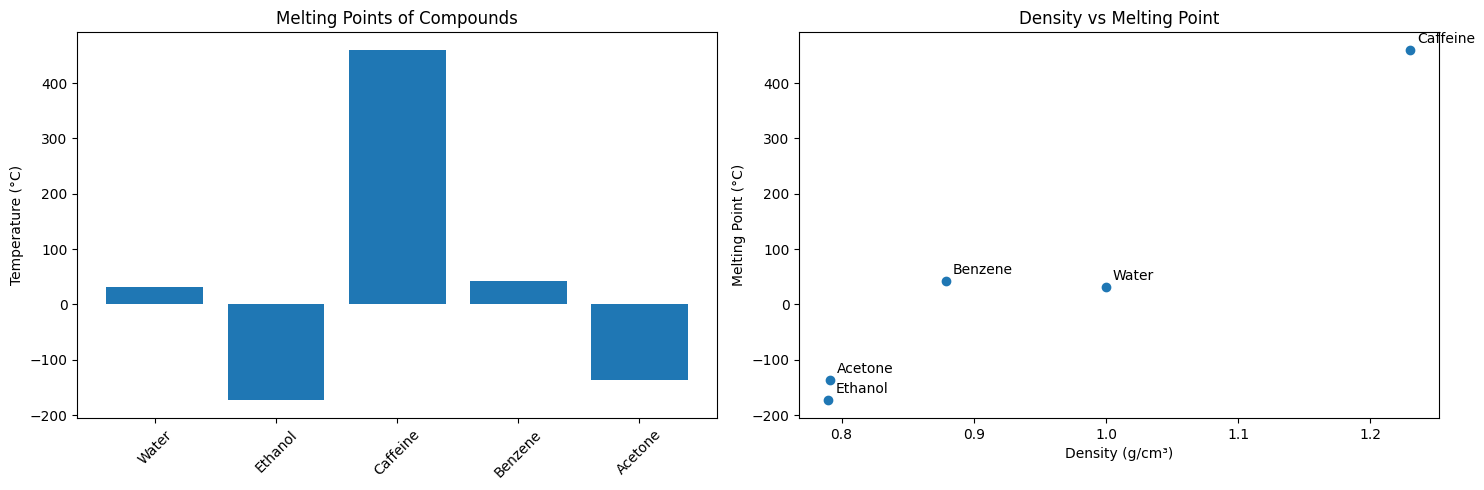

In [14]:
# Create visualizations
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Melting Points
mp_data = df[df['Melting Point'].notna()]
if not mp_data.empty:
    axes[0].bar(mp_data['Compound'], mp_data['Melting Point'])
    axes[0].set_title('Melting Points of Compounds')
    axes[0].set_ylabel('Temperature (°C)')
    axes[0].tick_params(axis='x', rotation=45)
else:
    axes[0].text(0.5, 0.5, 'No melting point data available', 
                ha='center', va='center', transform=axes[0].transAxes)
    axes[0].set_title('Melting Points (No Data)')

# Plot 2: Density vs Melting Point correlation
valid_data = df.dropna(subset=['Density', 'Melting Point'])
if len(valid_data) > 1:
    axes[1].scatter(valid_data['Density'], valid_data['Melting Point'])
    for i, row in valid_data.iterrows():
        axes[1].annotate(row['Compound'], 
                        (row['Density'], row['Melting Point']),
                        xytext=(5, 5), textcoords='offset points')
    axes[1].set_xlabel('Density (g/cm³)')
    axes[1].set_ylabel('Melting Point (°C)')
    axes[1].set_title('Density vs Melting Point')
else:
    axes[1].text(0.5, 0.5, 'Insufficient data for correlation', 
                ha='center', va='center', transform=axes[1].transAxes)
    axes[1].set_title('Density vs Melting Point (Insufficient Data)')

plt.tight_layout()
plt.show()

## Error Handling and Best Practices

When working with experimental data, it's important to handle missing data and errors gracefully.

In [22]:
# Test with various scenarios to demonstrate error handling
test_cases = [
    (2244, "Melting Point"),          # Should work
    (2244, "NonExistentProperty"),    # Should fail gracefully
    (999999999, "Melting Point"),     # Invalid CID
]

print("Error Handling Examples:")
print("=" * 50)

for cid, prop_name in test_cases:
    result = get_property_safely(cid, prop_name)
    
    print(f"\nCID {cid}, Property: {prop_name}")
    print(f"Success: {result['success']}")
    
    if result['success']:
        print(f"Found {result['count']} entries")
        if result['data']:
            first_entry = result['data'][0]
            print(f"First value: {first_entry.value} {first_entry.unit}")
    else:
        print(f"Error: {result['error']}")

Error Handling Examples:

CID 2244, Property: Melting Point
Success: True
Found 7 entries
First value: 275 °F (NTP, 1992) None

CID 2244, Property: Melting Point
Success: True
Found 7 entries
First value: 275 °F (NTP, 1992) None


Request failed, retrying in 1.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/2244/JSON?heading=NonExistentProperty
Request failed, retrying in 2.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/2244/JSON?heading=NonExistentProperty
Request failed, retrying in 2.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/2244/JSON?heading=NonExistentProperty
Request failed, retrying in 4.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/2244/JSON?heading=NonExistentProperty
Request failed, retrying in 4.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/2244/JSON?heading=NonExistentProperty



CID 2244, Property: NonExistentProperty
Success: False
Error: PubChemView error: Request failed after 4 attempts: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/2244/JSON?heading=NonExistentProperty


Property 'Melting Point' not found for CID 999999999



CID 999999999, Property: Melting Point
Success: False
Error: No data available


## Practical Applications

### Building a Chemical Property Database

Let's create a practical example of building a small chemical property database for risk assessment.

In [19]:
# Robust property retrieval function
def get_property_safely(cid, property_name, max_values=5):
    """
    Safely retrieve property data with comprehensive error handling.
    
    Args:
        cid: Compound ID
        property_name: Name of the property to retrieve
        max_values: Maximum number of values to return
    
    Returns:
        dict: Contains status, data, and any error messages
    """
    result = {
        'cid': cid,
        'property': property_name,
        'success': False,
        'data': [],
        'error': None,
        'count': 0
    }
    
    try:
        # Try to get the property data
        data = get_experimental_property(cid, property_name)
        
        if data:
            result['success'] = True
            result['data'] = data[:max_values]  # Limit number of entries
            result['count'] = len(data)
        else:
            result['error'] = "No data available"
            
    except PubChemViewNotFoundError:
        result['error'] = "Property not found"
    except PubChemViewError as e:
        result['error'] = f"PubChemView error: {str(e)}"
    except Exception as e:
        result['error'] = f"Unexpected error: {str(e)}"
    
    return result

print("Utility function loaded: get_property_safely()")

Utility function loaded: get_property_safely()


In [20]:
# Create a chemical safety database
safety_relevant_properties = [
    "Flash Point",
    "Auto-Ignition Temperature", 
    "Vapor Pressure",
    "LC50",
    "LD50"
]

# Industrial solvents for safety assessment
industrial_chemicals = {
    "Acetone": 180,
    "Ethanol": 702,
    "Benzene": 241,
    "Toluene": 1140,
    "Methanol": 887
}

print("Chemical Safety Database")
print("=" * 60)

safety_database = []

for chemical_name, cid in industrial_chemicals.items():
    chemical_data = {
        'name': chemical_name,
        'cid': cid,
        'properties': {}
    }
    
    print(f"\nProcessing {chemical_name} (CID: {cid})...")
    
    for prop in safety_relevant_properties:
        result = get_property_safely(cid, prop, max_values=1)
        
        if result['success'] and result['data']:
            value_info = result['data'][0]
            chemical_data['properties'][prop] = {
                'value': value_info.value,
                'unit': value_info.unit,
                'reference': value_info.reference
            }
            print(f"  ✓ {prop}: {value_info.value} {value_info.unit}")
        else:
            chemical_data['properties'][prop] = None
            print(f"  ✗ {prop}: {result['error']}")
    
    safety_database.append(chemical_data)

print(f"\n\nDatabase created with {len(safety_database)} chemicals")
print(f"Properties tracked: {', '.join(safety_relevant_properties)}")

Chemical Safety Database

Processing Acetone (CID: 180)...
  ✓ Flash Point: 0 °F (NTP, 1992) None
  ✓ Flash Point: 0 °F (NTP, 1992) None


Request failed, retrying in 1.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/180/JSON?heading=Auto-Ignition+Temperature
Request failed, retrying in 2.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/180/JSON?heading=Auto-Ignition+Temperature
Request failed, retrying in 2.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/180/JSON?heading=Auto-Ignition+Temperature
Request failed, retrying in 4.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/180/JSON?heading=Auto-Ignition+Temperature
Request failed, retrying in 4.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/180/JSON?heading=Auto-Ignition+Temperature


  ✗ Auto-Ignition Temperature: PubChemView error: Request failed after 4 attempts: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/180/JSON?heading=Auto-Ignition+Temperature
  ✓ Vapor Pressure: 180 mmHg at 68 °F ; 270 mmHg at 86 °F (NTP, 1992) mmHg
  ✓ Vapor Pressure: 180 mmHg at 68 °F ; 270 mmHg at 86 °F (NTP, 1992) mmHg


Request failed, retrying in 1.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/180/JSON?heading=LC50
Request failed, retrying in 2.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/180/JSON?heading=LC50
Request failed, retrying in 2.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/180/JSON?heading=LC50
Request failed, retrying in 4.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/180/JSON?heading=LC50
Request failed, retrying in 4.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/180/JSON?heading=LC50


  ✗ LC50: PubChemView error: Request failed after 4 attempts: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/180/JSON?heading=LC50


Request failed, retrying in 1.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/180/JSON?heading=LD50
Request failed, retrying in 2.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/180/JSON?heading=LD50
Request failed, retrying in 2.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/180/JSON?heading=LD50
Request failed, retrying in 4.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/180/JSON?heading=LD50
Request failed, retrying in 4.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/180/JSON?heading=LD50


  ✗ LD50: PubChemView error: Request failed after 4 attempts: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/180/JSON?heading=LD50

Processing Ethanol (CID: 702)...
  ✓ Flash Point: 55 °F (NTP, 1992) None
  ✓ Flash Point: 55 °F (NTP, 1992) None


Request failed, retrying in 1.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/702/JSON?heading=Auto-Ignition+Temperature
Request failed, retrying in 2.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/702/JSON?heading=Auto-Ignition+Temperature
Request failed, retrying in 2.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/702/JSON?heading=Auto-Ignition+Temperature
Request failed, retrying in 4.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/702/JSON?heading=Auto-Ignition+Temperature
Request failed, retrying in 4.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/702/JSON?heading=Auto-Ignition+Temperature


  ✗ Auto-Ignition Temperature: PubChemView error: Request failed after 4 attempts: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/702/JSON?heading=Auto-Ignition+Temperature
  ✓ Vapor Pressure: 40 mmHg at 66 °F ; 50 mmHg at 77 °F (NTP, 1992) mmHg
  ✓ Vapor Pressure: 40 mmHg at 66 °F ; 50 mmHg at 77 °F (NTP, 1992) mmHg


Request failed, retrying in 1.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/702/JSON?heading=LC50
Request failed, retrying in 2.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/702/JSON?heading=LC50
Request failed, retrying in 2.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/702/JSON?heading=LC50
Request failed, retrying in 4.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/702/JSON?heading=LC50
Request failed, retrying in 4.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/702/JSON?heading=LC50


  ✗ LC50: PubChemView error: Request failed after 4 attempts: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/702/JSON?heading=LC50


Request failed, retrying in 1.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/702/JSON?heading=LD50
Request failed, retrying in 2.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/702/JSON?heading=LD50
Request failed, retrying in 2.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/702/JSON?heading=LD50
Request failed, retrying in 4.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/702/JSON?heading=LD50
Request failed, retrying in 4.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/702/JSON?heading=LD50


  ✗ LD50: PubChemView error: Request failed after 4 attempts: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/702/JSON?heading=LD50

Processing Benzene (CID: 241)...
  ✓ Flash Point: 12 °F (NTP, 1992) None
  ✓ Flash Point: 12 °F (NTP, 1992) None


Request failed, retrying in 1.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/241/JSON?heading=Auto-Ignition+Temperature
Request failed, retrying in 2.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/241/JSON?heading=Auto-Ignition+Temperature
Request failed, retrying in 2.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/241/JSON?heading=Auto-Ignition+Temperature
Request failed, retrying in 4.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/241/JSON?heading=Auto-Ignition+Temperature
Request failed, retrying in 4.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/241/JSON?heading=Auto-Ignition+Temperature


  ✗ Auto-Ignition Temperature: PubChemView error: Request failed after 4 attempts: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/241/JSON?heading=Auto-Ignition+Temperature
  ✓ Vapor Pressure: 60 mmHg at 59 °F ; 76 mmHg at 68 °F (NTP, 1992) mmHg
  ✓ Vapor Pressure: 60 mmHg at 59 °F ; 76 mmHg at 68 °F (NTP, 1992) mmHg


Request failed, retrying in 1.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/241/JSON?heading=LC50
Request failed, retrying in 2.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/241/JSON?heading=LC50
Request failed, retrying in 2.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/241/JSON?heading=LC50
Request failed, retrying in 4.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/241/JSON?heading=LC50
Request failed, retrying in 4.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/241/JSON?heading=LC50


  ✗ LC50: PubChemView error: Request failed after 4 attempts: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/241/JSON?heading=LC50


Request failed, retrying in 1.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/241/JSON?heading=LD50
Request failed, retrying in 2.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/241/JSON?heading=LD50
Request failed, retrying in 2.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/241/JSON?heading=LD50
Request failed, retrying in 4.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/241/JSON?heading=LD50
Request failed, retrying in 4.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/241/JSON?heading=LD50


  ✗ LD50: PubChemView error: Request failed after 4 attempts: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/241/JSON?heading=LD50

Processing Toluene (CID: 1140)...
  ✓ Flash Point: 40 °F (NTP, 1992) None
  ✓ Flash Point: 40 °F (NTP, 1992) None


Request failed, retrying in 1.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/1140/JSON?heading=Auto-Ignition+Temperature
Request failed, retrying in 2.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/1140/JSON?heading=Auto-Ignition+Temperature
Request failed, retrying in 2.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/1140/JSON?heading=Auto-Ignition+Temperature
Request failed, retrying in 4.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/1140/JSON?heading=Auto-Ignition+Temperature
Request failed, retrying in 4.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/1140/JSON?heading=Auto-Ignition+Temperature


  ✗ Auto-Ignition Temperature: PubChemView error: Request failed after 4 attempts: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/1140/JSON?heading=Auto-Ignition+Temperature
  ✓ Vapor Pressure: 10 mmHg at 43.5 °F ; 20 mmHg at 65.1 °F; 40 mmHg at 89.2 °F (NTP, 1992) mmHg
  ✓ Vapor Pressure: 10 mmHg at 43.5 °F ; 20 mmHg at 65.1 °F; 40 mmHg at 89.2 °F (NTP, 1992) mmHg


Request failed, retrying in 1.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/1140/JSON?heading=LC50
Request failed, retrying in 2.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/1140/JSON?heading=LC50
Request failed, retrying in 2.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/1140/JSON?heading=LC50
Request failed, retrying in 4.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/1140/JSON?heading=LC50
Request failed, retrying in 4.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/1140/JSON?heading=LC50


  ✗ LC50: PubChemView error: Request failed after 4 attempts: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/1140/JSON?heading=LC50


Request failed, retrying in 1.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/1140/JSON?heading=LD50
Request failed, retrying in 2.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/1140/JSON?heading=LD50
Request failed, retrying in 2.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/1140/JSON?heading=LD50
Request failed, retrying in 4.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/1140/JSON?heading=LD50
Request failed, retrying in 4.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/1140/JSON?heading=LD50


  ✗ LD50: PubChemView error: Request failed after 4 attempts: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/1140/JSON?heading=LD50

Processing Methanol (CID: 887)...
  ✓ Flash Point: 52 °F (NTP, 1992) None
  ✓ Flash Point: 52 °F (NTP, 1992) None


Request failed, retrying in 1.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/887/JSON?heading=Auto-Ignition+Temperature
Request failed, retrying in 2.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/887/JSON?heading=Auto-Ignition+Temperature
Request failed, retrying in 2.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/887/JSON?heading=Auto-Ignition+Temperature
Request failed, retrying in 4.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/887/JSON?heading=Auto-Ignition+Temperature
Request failed, retrying in 4.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/887/JSON?heading=Auto-Ignition+Temperature


  ✗ Auto-Ignition Temperature: PubChemView error: Request failed after 4 attempts: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/887/JSON?heading=Auto-Ignition+Temperature
  ✓ Vapor Pressure: 100 mmHg at 70.2 °F ; 237.87 mmHg at 100 °F (NTP, 1992) mmHg
  ✓ Vapor Pressure: 100 mmHg at 70.2 °F ; 237.87 mmHg at 100 °F (NTP, 1992) mmHg


Request failed, retrying in 1.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/887/JSON?heading=LC50
Request failed, retrying in 2.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/887/JSON?heading=LC50
Request failed, retrying in 2.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/887/JSON?heading=LC50
Request failed, retrying in 4.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/887/JSON?heading=LC50
Request failed, retrying in 4.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/887/JSON?heading=LC50


  ✗ LC50: PubChemView error: Request failed after 4 attempts: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/887/JSON?heading=LC50


Request failed, retrying in 1.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/887/JSON?heading=LD50
Request failed, retrying in 2.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/887/JSON?heading=LD50
Request failed, retrying in 2.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/887/JSON?heading=LD50
Request failed, retrying in 4.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/887/JSON?heading=LD50
Request failed, retrying in 4.0s: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/887/JSON?heading=LD50


  ✗ LD50: PubChemView error: Request failed after 4 attempts: 400 Client Error: PUGVIEW.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/887/JSON?heading=LD50


Database created with 5 chemicals
Properties tracked: Flash Point, Auto-Ignition Temperature, Vapor Pressure, LC50, LD50


In [21]:
# Export the database to CSV for further analysis
import json

# Create a flattened version for CSV export
export_data = []
for chemical in safety_database:
    row = {
        'Chemical': chemical['name'],
        'CID': chemical['cid']
    }
    
    # Add property columns
    for prop in safety_relevant_properties:
        if chemical['properties'][prop]:
            row[f'{prop}_Value'] = chemical['properties'][prop]['value']
            row[f'{prop}_Unit'] = chemical['properties'][prop]['unit']
            row[f'{prop}_Reference'] = chemical['properties'][prop]['reference']
        else:
            row[f'{prop}_Value'] = None
            row[f'{prop}_Unit'] = None
            row[f'{prop}_Reference'] = None
    
    export_data.append(row)

# Convert to DataFrame and display summary
export_df = pd.DataFrame(export_data)
print("Database Summary:")
print("-" * 40)
print(f"Total chemicals: {len(export_df)}")
print(f"Total columns: {len(export_df.columns)}")

# Show data availability summary
for prop in safety_relevant_properties:
    available = export_df[f'{prop}_Value'].notna().sum()
    print(f"{prop}: {available}/{len(export_df)} compounds have data")

# Display the first few rows
print(f"\nFirst few rows of the database:")
print(export_df[['Chemical', 'CID'] + [f'{p}_Value' for p in safety_relevant_properties[:3]]].head())

Database Summary:
----------------------------------------
Total chemicals: 5
Total columns: 17
Flash Point: 5/5 compounds have data
Auto-Ignition Temperature: 0/5 compounds have data
Vapor Pressure: 5/5 compounds have data
LC50: 0/5 compounds have data
LD50: 0/5 compounds have data

First few rows of the database:
   Chemical  ...                               Vapor Pressure_Value
0   Acetone  ...  180 mmHg at 68 °F ; 270 mmHg at 86 °F (NTP, 1992)
1   Ethanol  ...    40 mmHg at 66 °F ; 50 mmHg at 77 °F (NTP, 1992)
2   Benzene  ...    60 mmHg at 59 °F ; 76 mmHg at 68 °F (NTP, 1992)
3   Toluene  ...  10 mmHg at 43.5 °F ; 20 mmHg at 65.1 °F; 40 mm...
4  Methanol  ...  100 mmHg at 70.2 °F ; 237.87 mmHg at 100 °F (N...

[5 rows x 5 columns]


## Conclusion and Next Steps

### What You've Learned

In this tutorial, you've learned how to:

1. **Initialize and use PubChemView** to access experimental chemical data
2. **Retrieve specific properties** like melting points, boiling points, and safety data
3. **Use convenience functions** for streamlined data access
4. **Handle errors gracefully** when data is missing or unavailable
5. **Build practical databases** for chemical safety and risk assessment
6. **Analyze and visualize** chemical property data
7. **Export data** for further analysis in other tools

### Key Features of PubChemView

- **Comprehensive Coverage**: Access to thousands of experimental properties
- **Robust Error Handling**: Graceful handling of missing data and API errors  
- **Multiple Data Formats**: Support for various property types and units
- **Batch Processing**: Efficient handling of multiple compounds
- **Data Quality**: Access to source information and multiple measurements

### Additional Resources

- **PubChem Documentation**: [https://pubchem.ncbi.nlm.nih.gov/docs/](https://pubchem.ncbi.nlm.nih.gov/docs/)
- **Available Properties**: [https://pubchem.ncbi.nlm.nih.gov/classification/#hid=72](https://pubchem.ncbi.nlm.nih.gov/classification/#hid=72)
- **API Reference**: Check the package documentation for complete method descriptions

### Best Practices

1. **Always handle errors** - Not all compounds have all properties
2. **Validate data quality** - Check sources and multiple measurements
3. **Respect rate limits** - The API has usage limitations
4. **Cache results** - Store frequently used data to avoid repeated requests
5. **Verify units** - Different sources may use different unit systems

Happy chemical data analysis! 🧪📊